# Seaborn methods testing

---
## Data initialization
Testing seaborn methods using the dataset [taxis](https://github.com/mwaskom/seaborn-data/blob/master/taxis.csv) from seaborn data exercises

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(rc={'figure.figsize' : (7,6)})
sns.set_style(style='whitegrid')

taxi_dataframe = pd.read_csv(r'data\taxi_dataframe.csv', parse_dates=['pickup', 'dropoff'])
taxi_dataframe.dropna(inplace=True)

In [2]:
taxi_dataframe

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [3]:
taxi_dataframe = taxi_dataframe.assign(trip_duration_minute = (taxi_dataframe['dropoff'] - taxi_dataframe['pickup']).dt.seconds//60)

In [4]:
# Columns rearrange
taxi_dataframe = taxi_dataframe[
    ['pickup', 
    'dropoff', 
    'trip_duration_minute', 
    'distance', 
    'fare', 
    'tip', 
    'tolls', 
    'total', 
    'color', 
    'payment', 
    'pickup_zone', 
    'dropoff_zone', 
    'pickup_borough', 
    'dropoff_borough', 
    ]
]

In [5]:
taxi_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6341 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pickup                6341 non-null   datetime64[ns]
 1   dropoff               6341 non-null   datetime64[ns]
 2   trip_duration_minute  6341 non-null   int64         
 3   distance              6341 non-null   float64       
 4   fare                  6341 non-null   float64       
 5   tip                   6341 non-null   float64       
 6   tolls                 6341 non-null   float64       
 7   total                 6341 non-null   float64       
 8   color                 6341 non-null   object        
 9   payment               6341 non-null   object        
 10  pickup_zone           6341 non-null   object        
 11  dropoff_zone          6341 non-null   object        
 12  pickup_borough        6341 non-null   object        
 13  dropoff_borough   

In [6]:
taxi_dataframe.dtypes

pickup                  datetime64[ns]
dropoff                 datetime64[ns]
trip_duration_minute             int64
distance                       float64
fare                           float64
tip                            float64
tolls                          float64
total                          float64
color                           object
payment                         object
pickup_zone                     object
dropoff_zone                    object
pickup_borough                  object
dropoff_borough                 object
dtype: object

In [7]:
taxi_dataframe

,pickup,dropoff,trip_duration_minute,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,6,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,7,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,7,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,25,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,9,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,3,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,56,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,19,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,5,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


---
## Data visualization with seaborn.histplot

### Visualization of univariate

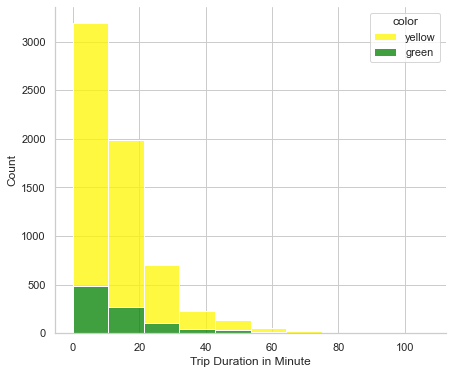

In [8]:
palette = ['#fff600', '#008000']
sns.histplot(
    x='trip_duration_minute',
    hue='color',
    palette=palette,
    multiple='stack',
    bins=10,
    data=taxi_dataframe,
)
plt.xlabel('Trip Duration in Minute');
sns.despine()

### Visualization of bivariate 

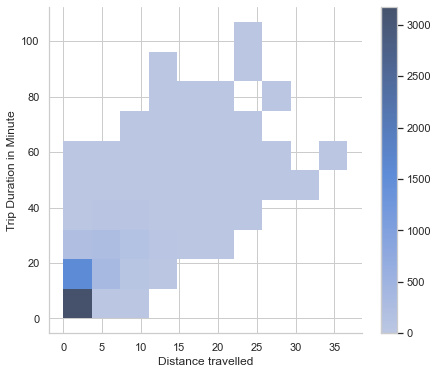

In [9]:
sns.histplot(
    x='distance',
    y='trip_duration_minute',
    cbar=True,
    bins=10,
    data=taxi_dataframe,
)

plt.xlabel('Distance travelled')
plt.ylabel('Trip Duration in Minute')
sns.despine()

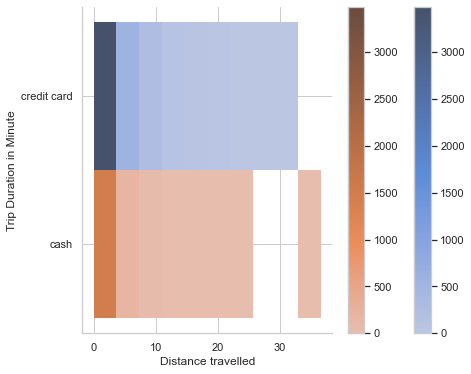

In [10]:
sns.histplot(
    x='distance',
    y='payment',
    hue='payment',
    legend=False,
    cbar=True,
    bins=10,
    data=taxi_dataframe,
)

plt.xlabel('Distance travelled')
plt.ylabel('Trip Duration in Minute')
sns.despine()

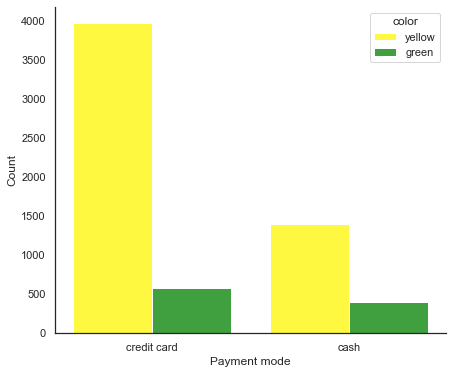

In [11]:
sns.set_style('white')

sns.histplot(
    x='payment',
    hue='color',
    palette=palette,
    multiple='dodge',
    legend=True,
    shrink=0.8,
    data=taxi_dataframe,
)

plt.xlabel('Payment mode')
sns.despine()

---
## Data visualization with seaborn.boxplot

In [12]:
trip_duration_10_filter = taxi_dataframe['trip_duration_minute'] <= 10
taxi_dataframe = taxi_dataframe.assign(trip_under_10 = trip_duration_10_filter)

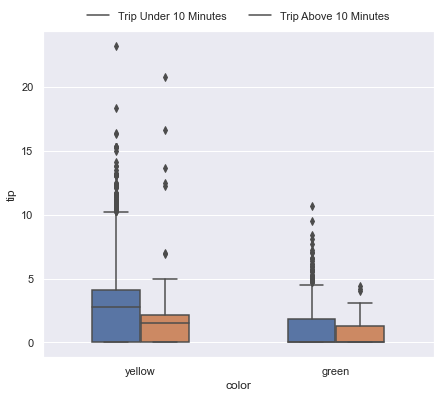

In [13]:
sns.set_style('darkgrid')
ax = sns.boxplot(
    x='color',
    y='tip',
    hue='trip_under_10',
    width=.5,
    data=taxi_dataframe,
)

ax.legend(['Trip Under 10 Minutes', 'Trip Above 10 Minutes'], loc='lower center', bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,)

---
## Data visualization with seaborn.ecdfplot

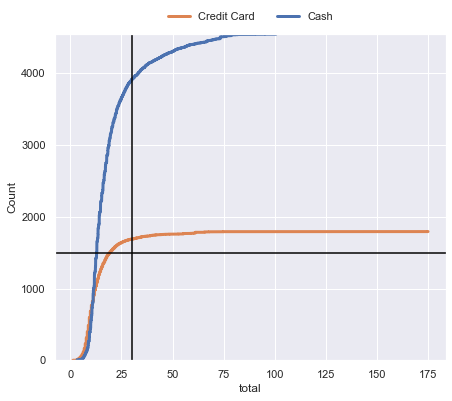

In [14]:
sns.set_style('darkgrid')
ax = sns.ecdfplot(
    x='total',
    hue='payment',
    stat='count',
    lw=3,
    data=taxi_dataframe,
)

ax.legend(['Credit Card', 'Cash'], loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=3, title=None, frameon=False,)
plt.axhline(1500, c='black')
plt.axvline(30,c='black');

---
## Data visualization with seaborn.relplot

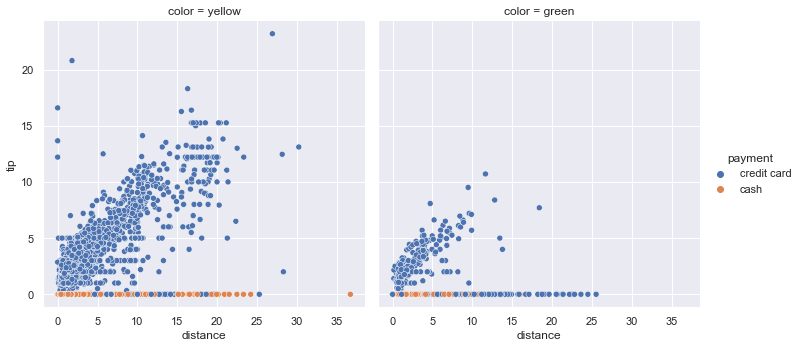

In [15]:
sns.relplot(
    x='distance',
    y='tip',
    col='color',
    hue='payment',
    kind='scatter',
    data=taxi_dataframe,
);

---
## Data visualization with seaborn.kdeplot

### Visualization with univariate

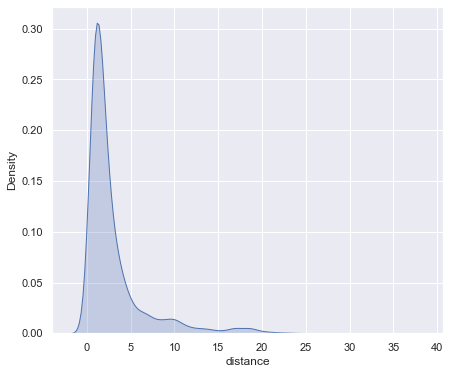

In [16]:
sns.kdeplot(
    data=taxi_dataframe['distance'],
    shade=True,
    # bw_adjust=.3,
);

### Visualization with bivariate

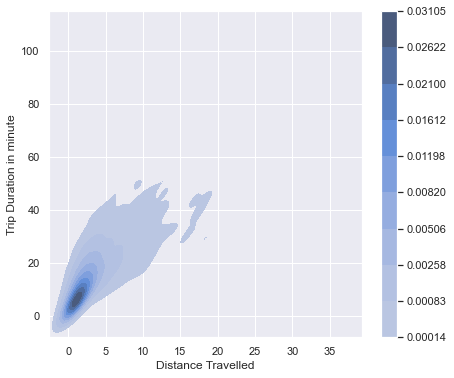

In [17]:
sns.kdeplot(
    x='distance',
    y='trip_duration_minute',
    shade=True,
    thresh=0.05,
    cbar=True,
    data=taxi_dataframe,
)

plt.ylabel('Trip Duration in minute')
plt.xlabel('Distance Travelled');


---
## Data visualization with seaborn.violinplot

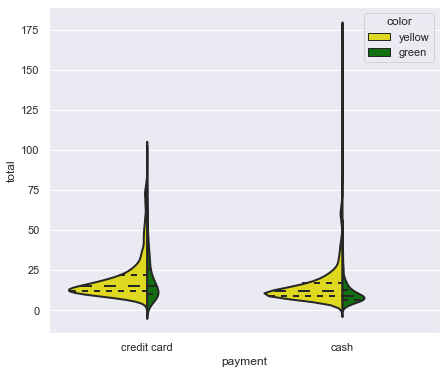

In [18]:
sns.violinplot(
    x='payment',
    y='total',
    hue='color',
    palette=palette,
    scale='count',
    linewidth=2,
    split=True,
    inner='quartiles',
    data=taxi_dataframe,
);


---
## Data visualization with seaborn.swarmplot

In [19]:
trip_duration_60_filter = taxi_dataframe['trip_duration_minute'] > 60
taxi_dataframe = taxi_dataframe.assign(trip_above_60 = trip_duration_60_filter)

<AxesSubplot:xlabel='payment', ylabel='fare'>

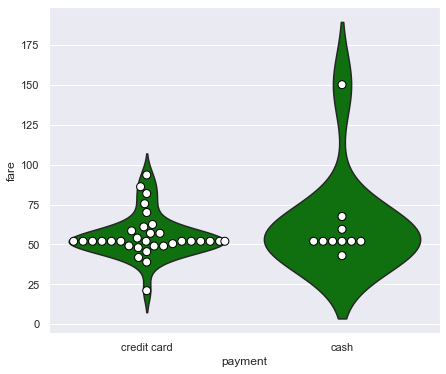

In [20]:
sns.violinplot(
    x='payment',
    y='fare',
    scale='width',
    inner=None,
    color='green',
    data=taxi_dataframe.loc[taxi_dataframe['trip_above_60'] == True],

)
sns.swarmplot(
    x='payment',
    y='fare',
    color='white',
    size=8,
    linewidth=1,
    edgecolor='black',
    data=taxi_dataframe.loc[taxi_dataframe['trip_above_60'] == True],
)

---
## Data visualization with seaborn.stripplot

In [21]:
from ipywidgets import interactive

def jitter_widget(jitter=0.05):
    sns.stripplot(
        x='distance',
        y='payment',
        hue='color',
        alpha=0.5,
        size=3,
        jitter=jitter,
        dodge=True,
        data=taxi_dataframe,
    )

In [22]:
interactive(jitter_widget, jitter=(0, 0.5))

interactive(children=(FloatSlider(value=0.05, description='jitter', max=0.5), Output()), _dom_classes=('widget…

---
## Data visualization with seaborn.scatterplot

<AxesSubplot:xlabel='trip_duration_minute', ylabel='tip'>

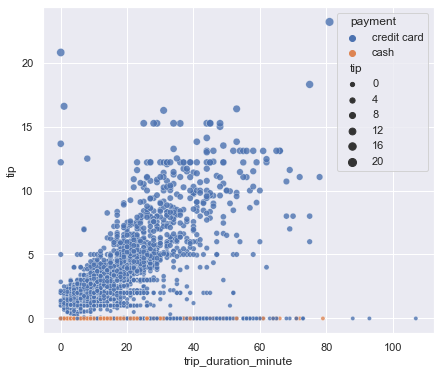

In [23]:
sns.scatterplot(
    x='trip_duration_minute',
    y='tip',
    size='tip',
    hue='payment',
    alpha=0.8,
    data=taxi_dataframe,
)

---
## Data visualization with seaborn.lineplot

In [24]:
pickup_dropoff_loc_filter = (taxi_dataframe['pickup_borough'] == 'Queens') & (taxi_dataframe['dropoff_borough'] == 'Manhattan')
taxi_dataframe = taxi_dataframe.assign(day_of_week = taxi_dataframe['pickup'].dt.day_name())

In [25]:
taxi_dataframe['day_of_week'] = taxi_dataframe['day_of_week'].apply(lambda x: x.lower())

<AxesSubplot:xlabel='day_of_week', ylabel='trip_duration_minute'>

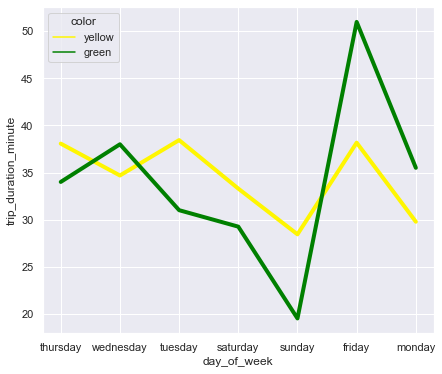

In [26]:
sns.lineplot(
    x='day_of_week',
    y='trip_duration_minute',
    hue='color',
    lw=4,
    palette=palette,
    ci=None,
    data=taxi_dataframe[pickup_dropoff_loc_filter],
)

---
## Data visualization with seaborn.regplot

In [27]:
taxi_dataframe_sample = taxi_dataframe.sample(n=200)

<AxesSubplot:xlabel='trip_duration_minute', ylabel='fare'>

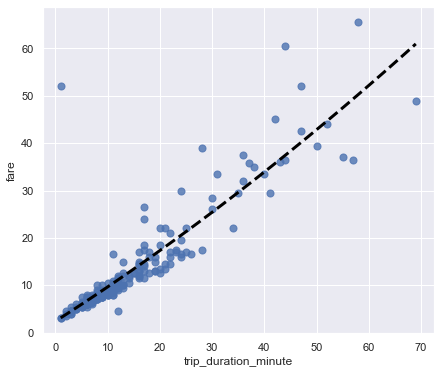

In [28]:
sns.regplot(
    x='trip_duration_minute',
    y='fare',
    order=2,
    ci=None,
    scatter_kws={'s': 50, 'alpha' : 0.8},
    line_kws={'lw' : 3, 'color' : 'black', 'linestyle' : '--',},
    data=taxi_dataframe_sample,
)

---
## Data visualization with seaborn.heatmap

In [29]:
def tip_bin(x):
    if (x == 0) | (x <= 1):
        return 0
    elif ((x > 1) & (x <= 5)):
        return 5
    elif ((x > 5) & (x <= 10)):
        return 10
    elif ((x > 10) & (x <= 15)):
        return 15
    elif ((x > 15) & (x <= 20)):
        return 20
    elif ((x > 20) & (x <= 25)):
        return 25

In [30]:
taxi_dataframe = taxi_dataframe.assign(tips_bin = taxi_dataframe['tip'].apply(tip_bin))

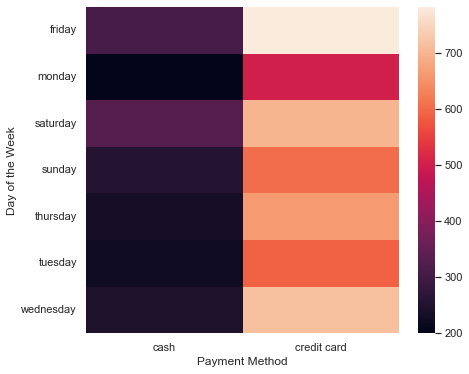

In [31]:
ax = sns.heatmap(
    data=taxi_dataframe.pivot_table(
        index='day_of_week', 
        columns='payment', 
        values='tip', 
        aggfunc='count',
    ),
)

sns.set(rc={'figure.figsize' : (5,3)})
ax.set_xlabel('Payment Method')
ax.set_ylabel('Day of the Week');


<AxesSubplot:>

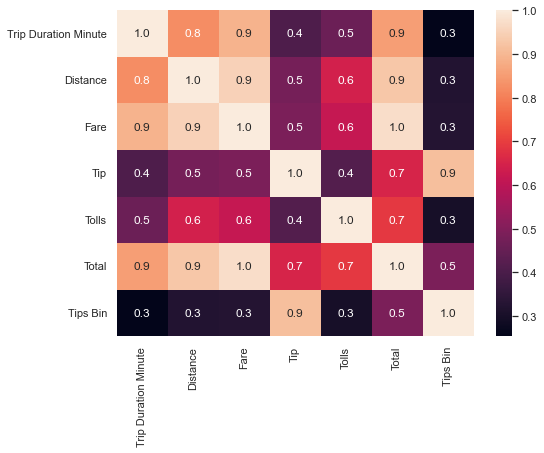

In [32]:
sns.set(rc={'figure.figsize' : (8,6)})

columns_filter = ((taxi_dataframe.columns != 'trip_under_10') & (taxi_dataframe.columns != 'trip_above_60'))
labels = [x.replace('_', ' ').title() for x in taxi_dataframe.loc[:, columns_filter].corr().columns]

sns.heatmap(
    data=taxi_dataframe.loc[:, columns_filter].corr(),
    annot=True,
    fmt='.1f',
    xticklabels=labels,
    yticklabels=labels,
)


---
## Data visualization with seaborn.clustermap

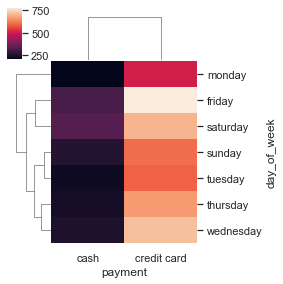

In [33]:
sns.clustermap(
    data=taxi_dataframe.pivot_table(
        index='day_of_week', 
        columns='payment', 
        values='tips_bin', 
        aggfunc='count',
    ),
    figsize=(4,4)
)

In [34]:
taxi_dataframe.loc[taxi_dataframe['day_of_week'].isin(['friday']), ['day_of_week', 'payment', 'tips_bin']].value_counts().unstack().fillna(0)

tips_bin                    0      5     10    15   20   25
day_of_week payment                                        
friday      cash         310.0    0.0   0.0   0.0  0.0  0.0
            credit card  144.0  560.0  57.0  16.0  3.0  1.0

In [35]:
# Setting categorical order
taxi_dataframe['day_of_week'] =  pd.Categorical(
    taxi_dataframe['day_of_week'],
    categories=['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'],
    ordered=True,
)

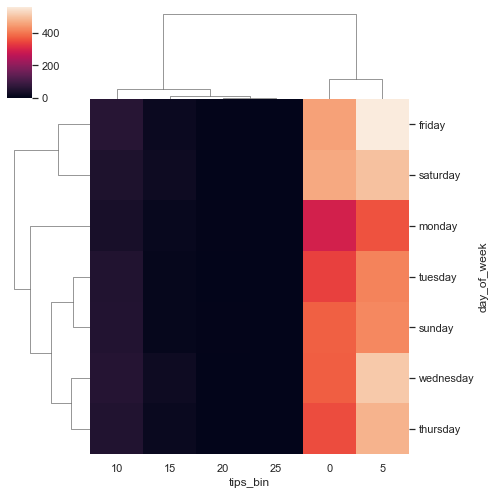

In [36]:
sns.clustermap(
    data=taxi_dataframe.groupby(['day_of_week'])['tips_bin'].value_counts().unstack().fillna(0),
    figsize=(7,7),
)


C:\Users\Cabrera\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


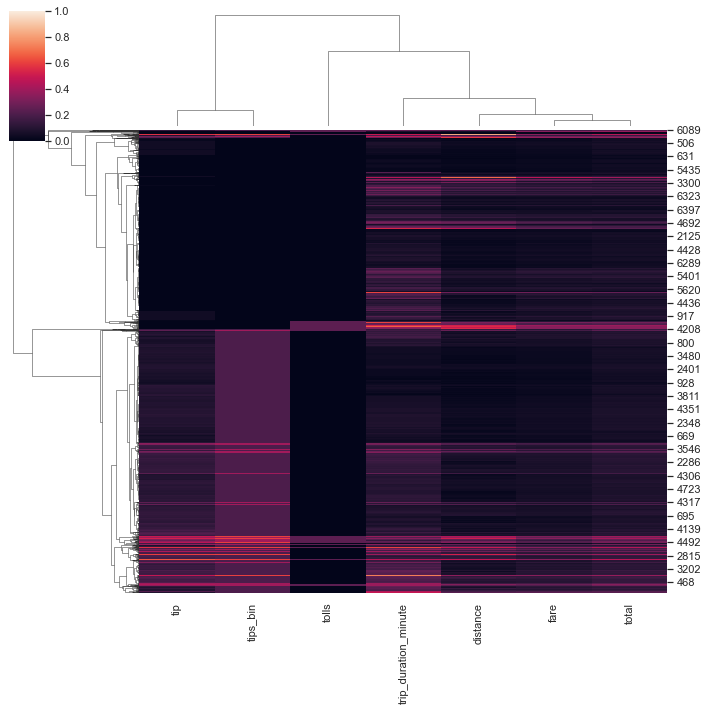

In [37]:
numerical_cols = taxi_dataframe.select_dtypes(include=np.number).columns.tolist()

sns.clustermap(
    data=taxi_dataframe[numerical_cols].fillna(0),
    standard_scale=1,
    metric='correlation',
)

---
## Data visualization with seaborn.barplot

<AxesSubplot:xlabel='day_of_week', ylabel='trip_duration_minute'>

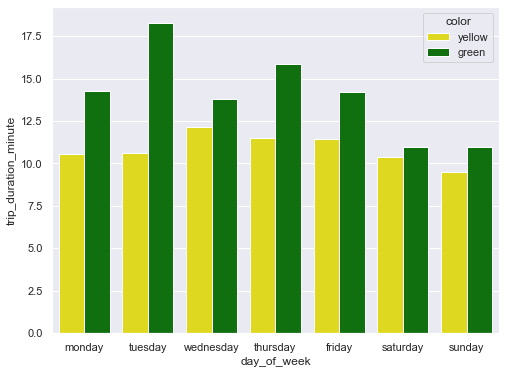

In [38]:
sns.barplot(
    data=taxi_dataframe,
    x='day_of_week',
    y='trip_duration_minute',
    hue='color',
    palette=palette,
    errcolor='darkslateblue',
    errwidth=5,
    estimator=np.std,
    ci=None,
    
)

---
## Data visualization with seaborn.countplot

<AxesSubplot:xlabel='color', ylabel='count'>

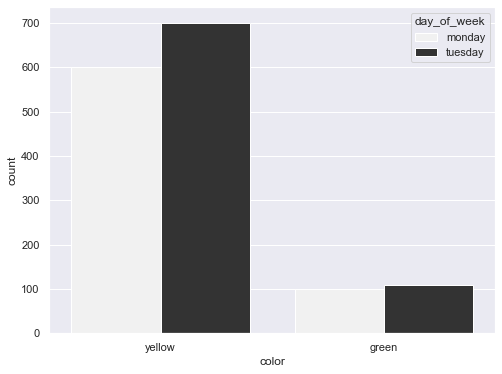

In [39]:
sns.countplot(
    data=taxi_dataframe,
    x='color',
    color='#333333',
    hue='day_of_week',
    hue_order=['monday', 'tuesday'],
    # fill=True,
    # lw=3,
    # ec='white',
    # hatch='/',
)

---
## Data visualization with seaborn.pairplot

In [45]:
taxi_dataframe = taxi_dataframe.assign(is_weekend = taxi_dataframe['day_of_week'].isin(['saturday', 'sunday']))

In [65]:
columns_filter = ~taxi_dataframe.columns.isin(['trip_duration_minute', 'trip_under_10', 'trip_above_60', 'day_of_week', 'tips_bin'])

def size_widget(height=2.5, aspect=1):
    sns.pairplot(
        data=taxi_dataframe.loc[:, columns_filter],
        vars=['distance', 'fare', 'tip', 'total'],
        hue='is_weekend',
        kind='reg',
        plot_kws={
            'ci': None,
            'scatter_kws' : {'s' : 3},
            'line_kws': {'lw' : 1, 'linestyle' : '--',},
            },
        diag_kind='kde',
        palette='plasma',
        height=height,
        aspect=aspect,
    )

In [66]:
interactive(size_widget, height=(1,4,0.5), aspect=(0.5, 2, 0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=4.0, min=1.0, step=0.5), FloatSlider(va…

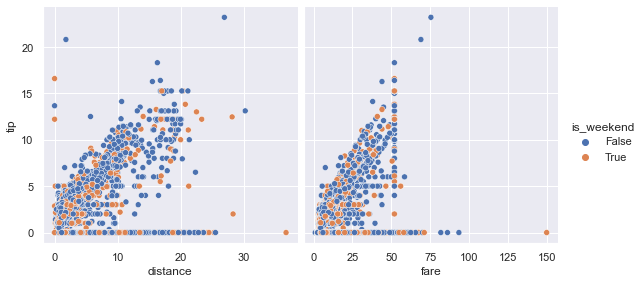

In [52]:
sns.pairplot(
    data=taxi_dataframe.loc[:, columns_filter],
    y_vars=['tip'],
    x_vars=['distance', 'fare',],
    hue='is_weekend',
    diag_kind='kde',
    height=4,
)

---
## Data visualization with seaborn.jointplot